<img src="./0930a77ee0324179b794b6f574efc129.jpg" alt="EREN" width="98%" />

<h1 style="font-size: 7em; text-align: center;"><span style="color:#2E4053">LA POPULARIDAD DEL ANIME</span></h1>

 # <span style="color:#AEB6BF   "> ANALISIS EXPLORATORIO DE DATOS(EDA) DEL ANIME </span>
 

## <span style="color:#85929E "> TEMA </span>

ANIME. El anime es una forma de expresión artística japonesa que ha ganado popularidad a nivel mundial, ha cautivado a audiencias de todas las edades con sus historias, personajes memorables y estilos visuales. Asi que vamos a realizar un análisis exploratorio de datos para estudiar los factores que contribuyen a la popularidad en el mundo del anime.


### <span style="color:#85929E "> OBJETIVO </span>

El objetivo de este EDA es estudiar lo que resuena con la audiencia y contribuye a la popularidad en el mundo del anime 

## <span style="color:#85929E "> DATASETS Y FUENTES ALTERNATIVAS DE DATOS </span> 


**LINK de la base de datos que voy a usar en este EDA:**
>[KAGGLE- ANIME](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)

>[KAGGLE- ANIME2](https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022)

>[Myanimelist API](https://myanimelist.net/apiconfig)

>[Kitsu API](https://kitsu.docs.apiary.io/#)

>[Anilist API](https://anilist.gitbook.io/anilist-apiv2-docs/)

>[RapidAPI](https://rapidapi.com/search/anime)

## <span style="color:#85929E "> IMPORTACIONES </span> 

In [767]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <span style="color:#85929E "> BASE DE DATOS INICIAL </span> 

In [768]:
anime = pd.read_csv("./anime.csv")
anime.head(5)

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [769]:
#VER LA INFORMACION DE LA BASE DE DATOS INICIAL
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [770]:
#VER LAS FILAS Y COLUMNAS QUE TIENE
anime.shape

(14952, 25)

In [771]:
#VER SI MI BASE DE DATOS TIENE VALORES NULOS
anime.isna().any() 

anime_id         False
Name             False
Score            False
Genres           False
English name     False
Japanese name    False
sypnopsis         True
Type             False
Episodes         False
Aired            False
Premiered        False
Producers        False
Licensors        False
Studios          False
Source           False
Duration         False
Rating           False
Ranked            True
Popularity       False
Members          False
Favorites        False
Watching         False
Completed        False
On-Hold          False
Dropped          False
dtype: bool

## <span style="color:#85929E "> LIMPIEZA DE LA BASE DE DATOS </span> 

#### <span style="color:#2874A6 ">A - Valores nulos </span> 

##### <span style="color:#76D7C4 "> A1 - Ver cuantos valores nulos tengo, donde y el total: </span> 

In [772]:
#CUANTOS VALORES NULOS TENGO POR CADA COLUMNA
anime.isnull().sum() 

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [773]:
#CUANTOS VALORES NULOS TENGO EN TOTAL
anime.isnull().sum().sum() 

3071

##### <span style="color:#76D7C4  "> A2- Ver la proporcion de valores nulos: </span>  

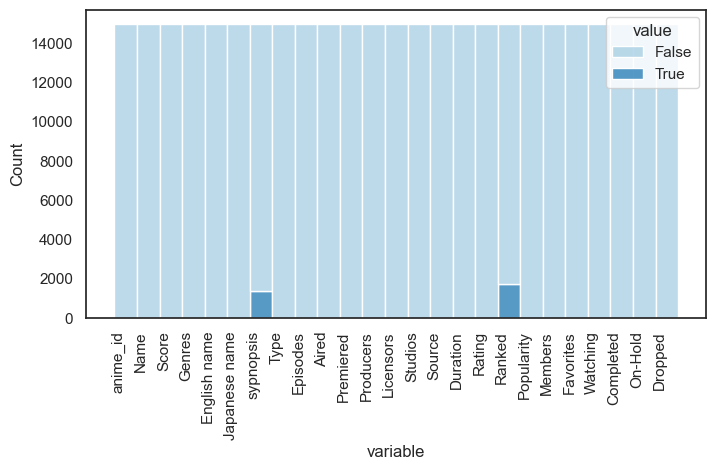

In [774]:
#GRAFICA PARA VISUALIZAR LA PROPORCION DE MIS DATOS NULOS
anime_nulos = anime.isnull()

plt.figure(figsize=(8, 4))
sns.set(style="white")


sns.histplot(data=anime_nulos.melt(), x="variable", hue="value", multiple="stack", palette= "Paired" )
plt.xticks(rotation=90, ha="right")

plt.show()

#### <span style="color:#2874A6 "> B - Valores duplicados </span> 

In [775]:
#QUIERO VER CUANTOS VALORES DUPLICADOS TENGO EN LA COLUMNA NAME
anime["Name"].duplicated().sum()

3

In [776]:
#QUIERO ENCONTRAR LAS FILAS DUPLICADAS
dupli= anime[anime.duplicated(subset='Name', keep=False)]
dupli["Name"]

11880                                          Hinamatsuri
12365                                          Hinamatsuri
14123    Maou Gakuin no Futekigousha: Shijou Saikyou no...
14937    Maou Gakuin no Futekigousha: Shijou Saikyou no...
14938    Maou Gakuin no Futekigousha: Shijou Saikyou no...
Name: Name, dtype: object

In [777]:
#QUIERO VER SI ESAS FILAS DUPLICADAS REALMENTE SON IGUALES COMPARANDOLAS CON EL TIPO
dupli.sort_values(by=['Name', 'Type'])

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
11880,35102,Hinamatsuri,6.79,"Historical, Kids",Unknown,ひなまつり,ducational anime about the history and foundin...,OVA,1,Unknown,...,19 min.,G - All Ages,4486.0,10044,1201,2,52,399,17,92
12365,36296,Hinamatsuri,8.21,"Comedy, Sci-Fi, Seinen, Slice of Life, Superna...",Hinamatsuri,ヒナまつり,hile reveling in the successful clinching of a...,TV,12,"Apr 6, 2018 to Jun 22, 2018",...,23 min. per ep.,PG-13 - Teens 13 or older,298.0,391,347326,3265,27757,209253,9457,7827
14123,40496,Maou Gakuin no Futekigousha: Shijou Saikyou no...,7.34,"Action, Demons, Magic, Fantasy, School",The Misfit of Demon King Academy,魔王学院の不適合者 ～史上最強の魔王の始祖、転生して子孫たちの学校へ通う～,"In the distant past, a war between humans and ...",TV,13,"Jul 4, 2020 to Sep 26, 2020",...,23 min. per ep.,R - 17+ (violence & profanity),2177.0,377,356060,3057,48873,236529,4880,9563
14937,48417,Maou Gakuin no Futekigousha: Shijou Saikyou no...,6.51,"Magic, Fantasy, School",Unknown,魔王学院の不適合者 ～史上最強の魔王の始祖、転生して子孫たちの学校へ通う～,Second season of Maou Gakuin no Futekigousha: ...,TV,Unknown,Unknown,...,Unknown,R - 17+ (violence & profanity),NaN,2597,41425,281,7,5,11,1
14938,48418,Maou Gakuin no Futekigousha: Shijou Saikyou no...,6.51,"Action, Demons, Magic, Fantasy, School",Unknown,魔王学院の不適合者 ～史上最強の魔王の始祖、転生して子孫たちの学校へ通う～,Second half of Maou Gakuin no Futekigousha: Sh...,TV,Unknown,Unknown,...,Unknown,R - 17+ (violence & profanity),NaN,5731,7707,41,1,2,5,2


In [778]:
#AHORA QUE VOY A MODIFICAR COSAS VOY A HACER UN COPY PARA NO ALTERAR MI BASE DE DATOS INICIAL
anime_copia = anime.copy()

In [779]:
#HE COMPROBADO QUE DOS SON IGUALES ASI QUE VOY A ELIMINAR ESOS DOS. los animes con los indices 14938 y el 14937 los voy a eliminar 
indices = [14938, 14937]  

#reiniciar los indices y eliminar los indices antiguos

anime_copia.drop(indices, inplace=True)

In [780]:
#COMPROBAR SI SE HA BORRADO CORRECTAMENTE LOS VALORES DUPLICADOS 
anime_copia["Name"].duplicated().sum()

1

In [781]:
#COMPROBAR LOS QUE NO HE ELIMINADO
anime_copia[anime_copia.duplicated(subset='Name', keep=False)]


,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
11880,35102,Hinamatsuri,6.79,"Historical, Kids",Unknown,ひなまつり,ducational anime about the history and foundin...,OVA,1,Unknown,...,19 min.,G - All Ages,4486.0,10044,1201,2,52,399,17,92
12365,36296,Hinamatsuri,8.21,"Comedy, Sci-Fi, Seinen, Slice of Life, Superna...",Hinamatsuri,ヒナまつり,hile reveling in the successful clinching of a...,TV,12,"Apr 6, 2018 to Jun 22, 2018",...,23 min. per ep.,PG-13 - Teens 13 or older,298.0,391,347326,3265,27757,209253,9457,7827


#### <span style="color:#2874A6"> C - Eliminar lo que no me interesa </span> 

##### <span style="color:#76D7C4"> C1 - Eliminar columnas que no me interesan </span>   

In [782]:
#BORRAR ESTAS COLUMNAS YA QUE DESDE MI PUNTO DE VISTA SON INNECESARIAS PARA EL ANALISIS QUE VOY A HACER
anime_copia.drop(["English name","Japanese name", "sypnopsis", "On-Hold","anime_id"], axis=1, inplace=True)

In [783]:
#COMPROBAR SI SE HAN ELIMINADO CORRECTAMENTE
anime_copia.head(1)

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,26678


##### <span style="color:#76D7C4">C2 - Eliminar filas con nan: </span>    

In [784]:
#EN LA COLUMNA RANCKED HAY VARIOS NAN, ASI QUE VOY A ELIMINAR ESAS FILAS
anime_copia = anime_copia.dropna(subset=["Ranked"])

In [785]:
#COMPROBAR SI ESAS FILAS SE HAN ELIMINADO
anime_copia.shape

(13231, 20)

In [786]:
#VER SI LOS VALORES NULOS SE HAN ELIMINADO
anime_copia.isnull().sum().sum() 

0

##### <span style="color:#76D7C4"> C3 - Quitar los tipos de animes que no me interesa analizar: </span> 

In [787]:
#COMPROBAR LA COLUMNA TYPE
anime_copia["Type"].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music'], dtype=object)

           No me interesa analizar ONA, MUSIC Y SPECIAL

In [788]:
#QUIRAR LA COLUMNA MUSIC, ONA Y SPECIAL YA QUE NO QUIERO QUE ESTE EN EL ANALISIS.
anime_copia = anime_copia[(anime_copia["Type"] != "Music")].reset_index(drop=True)

<span style="color:#76D7C4"> Comprobar columna: </span>  

In [789]:
#COMPRUEBO FILAS Y COLUMNAS OTRA VEZ
anime_copia.shape

(12487, 20)

In [790]:
#COMPRUEBO QUE YA NO ESTAN EN TYPE
anime_copia["Type"].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA'], dtype=object)

#### <span style="color:#2874A6"> D - Arreglar las filas con los valores en forma de listas </span> 

##### <span style="color:#76D7C4"> D1 - Columna generos </span> 

     Los generos de cada fila vienen en listas, asi que voy a separarlos haciendo un dummy

In [791]:
#HAGO UNA FUNCION LAMBDA CON SPLIT PARA SEPARAR LOS GENEROS DE UNA LISTA DE GENEROS
anime_copia["Genres"] = anime_copia["Genres"].apply(lambda x: x.split(', '))



#HACER UNA VARIABLE DUMMY PARA DIVIDIR LOS GENEROS EN UN DATAFRAME
generos = pd.get_dummies(anime_copia["Genres"].apply(pd.Series).stack(), prefix="Genre").groupby(level=0).max()


In [792]:
generos.head()

,Genre_Action,Genre_Adventure,Genre_Cars,Genre_Comedy,Genre_Dementia,Genre_Demons,Genre_Drama,Genre_Ecchi,Genre_Fantasy,Genre_Game,...,Genre_Shounen,Genre_Shounen Ai,Genre_Slice of Life,Genre_Space,Genre_Sports,Genre_Super Power,Genre_Supernatural,Genre_Thriller,Genre_Unknown,Genre_Vampire
0,True,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,True,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False


In [793]:
#NO ME GUSTA QUE TENGA "Genre_" EN EL NOMBRE DE LA COLUMNA ASI QUE LO VOY A MODIFICAR CON UN LAMBDA
generos = generos.rename(columns=lambda x: x.replace("Genre_", ""))

In [794]:
#COMPRUEBO QUE SE HA MODIFICADO
generos.head(1)

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire
0,True,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


##### <span style="color:#76D7C4"> D2 - Columna Aired </span> 

In [795]:
#VER PARTE DEL CONTENIDO DE ESA COLUMNA
anime_copia["Aired"].head(50)

0      Apr 3, 1998 to Apr 24, 1999
1                      Sep 1, 2001
2      Apr 1, 1998 to Sep 30, 1998
3      Jul 2, 2002 to Dec 24, 2002
4     Sep 30, 2004 to Sep 29, 2005
5      Apr 6, 2005 to Mar 19, 2008
6     Apr 15, 2005 to Sep 27, 2005
7     Sep 11, 2002 to Sep 10, 2003
8     Apr 17, 2004 to Feb 18, 2006
9      Apr 7, 2004 to Sep 28, 2005
10      Oct 3, 2002 to Feb 8, 2007
11               Oct 20, 1999 to ?
12    Oct 10, 2001 to Mar 23, 2005
13     Oct 6, 2004 to Dec 15, 2004
14     Oct 5, 2004 to Mar 29, 2005
15     Oct 6, 2004 to Mar 30, 2005
16    Apr 17, 2003 to Sep 25, 2003
17    Apr 29, 2005 to Oct 28, 2005
18    Oct 12, 2004 to Mar 14, 2006
19      Oct 8, 2004 to Apr 1, 2005
20     Oct 4, 1995 to Mar 27, 1996
21                    Mar 15, 1997
22                    Jul 19, 1997
23      Oct 8, 1997 to Apr 1, 1998
24                    Nov 18, 1995
25    Feb 20, 1999 to Sep 22, 1999
26     Jan 10, 1996 to Sep 8, 1998
27                    Dec 20, 1997
28                  

     En la columna Aired quiero separar el mes y el año y ponerlo en dos columnas 

In [796]:
#AQUI HE HECHO UN REGEX PARA SEPARAR PARTE DE AIRED Y PODER CREAR DOS COLUMNAS SEPARADAS DE MES Y AÑO POR QUE ES LA UNICA MANERA QUE ME HA FUNCIONADO
anime_copia["Meses"] = anime_copia["Aired"].str.extract(r"(\w{3} \d{1,2}, \d{4})")

#SEPARAR LOS MESES Y Y METERLO EN UNA COLUMNA LLAMADA MES DE LANZAMIENTO
anime_copia["Month Aired"] = anime_copia["Meses"].str.extract(r"(\w{3})")
#LO MISMO CON EL AÑO
anime_copia["Year Aired"] = anime_copia["Meses"].str.extract(r", (\d{4})")


In [797]:
#VER SI HA FUCIONADO 
anime_copia.head(3)

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,...,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped,Meses,Month Aired,Year Aired
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,...,28.0,39,1251960,61971,105808,718161,26678,"Apr 3, 1998",Apr,1998
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,...,159.0,518,273145,1174,4143,208333,770,"Sep 1, 2001",Sep,2001
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,...,266.0,201,558913,12944,29113,343492,13925,"Apr 1, 1998",Apr,1998


     Ahora tengo unas columnas que sobran que son Aired y Meses

In [798]:
#ELIMINAR LAS COLUMNAS AIRED Y MESES
anime_copia.drop(columns=["Aired","Meses"], inplace=True)

In [799]:
#COMO NO QUIERO QUE MES Y AÑO SEAN LAS ULTIMAS COLUMNAS VOY A CAMBIARLAS DE SITIO

#AQUI HAGO UN POP PARA LUEGO PODER INSERTARLO EN LA POSICION QUE QUIERA Y NO SEA LA ULTIMA COLUMNA, NO ME DEJABA SIN EL POP
mes = anime_copia.pop("Month Aired")
anime_copia.insert(5, "Month Aired", mes)

In [800]:
#LO PONGO EN LA POSICION DE AL LADO DE MES DE LANZAMIENTO
year = anime_copia.pop("Year Aired")
anime_copia.insert(6, "Year Aired", year)

In [801]:
anime_copia.head()

#todo OK por ahora

,Name,Score,Genres,Type,Episodes,Month Aired,Year Aired,Premiered,Producers,Licensors,...,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",TV,26,Apr,1998,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",...,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Movie,1,Sep,2001,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,...,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,770
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",TV,26,Apr,1998,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",...,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,13925
3,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",TV,26,Jul,2002,Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",...,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5378
4,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",TV,52,Sep,2004,Fall 2004,"TV Tokyo, Dentsu",Unknown,...,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,1108


##### <span style="color:#76D7C4"> D3 - Comprobar otra vez los valores nan </span> 

In [802]:
anime_copia.isnull().sum()

Name             0
Score            0
Genres           0
Type             0
Episodes         0
Month Aired    873
Year Aired     873
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
Dropped          0
dtype: int64

In [803]:
#POR AHORA LOS VOY A LLAMAR A LOS VALORES NAN UNKOWNS PARA PASAR A LO SIGUIENTE Y QUE NO ME DE ERROR POR LOS NAN
anime_copia["Month Aired"] = anime_copia["Month Aired"].fillna("Unknown")
anime_copia["Year Aired"] = anime_copia["Year Aired"].fillna("Unknown")

In [804]:
anime_copia.isnull().sum()

Name           0
Score          0
Genres         0
Type           0
Episodes       0
Month Aired    0
Year Aired     0
Premiered      0
Producers      0
Licensors      0
Studios        0
Source         0
Duration       0
Rating         0
Ranked         0
Popularity     0
Members        0
Favorites      0
Watching       0
Completed      0
Dropped        0
dtype: int64

##### <span style="color:#76D7C4"> D4 - Arreglar los valores UNKNOWN de la columna premiere </span> 

In [805]:
#AQUI QUIERO DEJAR LA ESTACION DEL AÑO Y ELIMINAR EL AÑO 
anime_copia["Season Premiered"] = anime_copia["Premiered"].str.split().str[0]

#PONERLA EN EL MISMO SITIO QUE PREMIERED ORIGINAL
anime_copia["Premiered"] = anime_copia.pop("Season Premiered") 

In [806]:
#COMPROBAR SI HA FUNCIONADO
anime_copia.head(2)

,Name,Score,Genres,Type,Episodes,Month Aired,Year Aired,Premiered,Producers,Licensors,...,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",TV,26,Apr,1998,Spring,Bandai Visual,"Funimation, Bandai Entertainment",...,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Movie,1,Sep,2001,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,...,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,770


     Quiero arreglar los Unknown de Premiered comparandolos con el mes de lanzamiento 

In [807]:
#MAPEAR LOS MESES A ESTACIONES DEL AÑO
estaciones = {"Dec": "Winter",
              "Jan": "Winter",
              "Feb":"Winter",
              "Mar":"Spring" ,
              "Apr" :"Spring",
              "May":"Spring" ,
              "Jun": "Summer",
              "Jul" :"Summer",
              "Aug": "Summer",
              "Sep":"Fall",
              "Oct":"Fall" ,
              "Nov": "Fall"}

# CON ESTE REEMPLAZO LOS UNKNOWS POR LAS ESTACIONES
quitar_desconocidos = lambda row: estaciones.get(row["Month Aired"], row["Premiered"])
anime_copia["Premiered"] = anime_copia.apply(quitar_desconocidos, axis=1)

In [808]:
#COMPROBAR SI SE HAN CAMBIADO
anime_copia["Premiered"].unique()

array(['Spring', 'Fall', 'Summer', 'Winter', 'Unknown'], dtype=object)

##### <span style="color:#76D7C4"> D5 - Columna rating </span> 

In [809]:
#QUIERO DEJAR SOLO LAS LETRAS R, PG, R+ Y G
anime_copia["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Unknown'],
      dtype=object)

In [810]:
anime_copia["Rating"] = anime_copia["Rating"].str.extract(r"(R|PG|R\+|G|)")
# RENOMBRAR A LOS NAN COMO ESTABAN POR UNKNOWN
anime_copia["Rating"] = anime_copia["Rating"].fillna("Unknown")

##### <span style="color:#76D7C4"> D5 - Columna producers </span> 

In [812]:
anime_copia["Producers"].unique()

array(['Bandai Visual', 'Sunrise, Bandai Visual', 'Victor Entertainment',
       ..., 'Bandai, Chukyo TV Broadcasting, FIREBUG', 'IMAGICA Lab.',
       'Suiseisha, blackflag'], dtype=object)

## <span style="color:#85929E "> GUARDAR BASE DE DATOS </span> 

In [660]:
#Guardar base de datos limpia
ruta = "./anime-filtered - Copy.csv"
anime_copia.to_csv(ruta, index=False, encoding='utf-8')

## <span style="color:#85929E "> ANALISIS EXPLORATORIO </span> 

In [661]:
anime_copia.head(4)

,Name,Score,Genres,Type,Episodes,Month Aired,Year Aired,Premiered,Producers,Licensors,...,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",TV,26,Apr,1998,Spring,Bandai Visual,"Funimation, Bandai Entertainment",...,Original,24 min. per ep.,R,28.0,39,1251960,61971,105808,718161,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Movie,1,Sep,2001,Fall,"Sunrise, Bandai Visual",Sony Pictures Entertainment,...,Original,1 hr. 55 min.,R,159.0,518,273145,1174,4143,208333,770
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",TV,26,Apr,1998,Spring,Victor Entertainment,"Funimation, Geneon Entertainment USA",...,Manga,24 min. per ep.,PG,266.0,201,558913,12944,29113,343492,13925
3,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",TV,26,Jul,2002,Summer,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",...,Original,25 min. per ep.,PG,2481.0,1467,94683,587,4300,46165,5378


      DAFAFRAME GENEROS

In [662]:
generos

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire
0,True,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,True,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
12483,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
12484,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
12485,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### <span style="color:#2874A6  "> Significado de las columnas </span> 

| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| **Name**| *Nombre del anime*|
| **Score** | *Puntuación media del anime* |
| **Genres** | *Generos del anime* |
| **Type** | *Tipo de anime. serie, película u OVA* |
| **Episodes** | *Episodios del anime* |
| **Month Aired** | *Meses en los que se emitió el anime* |
| **Year Aired** | *Años en los que se emitió el anime* |
| **Premiered** | *La temporada y año en que se estrenó el anime* |
| **Producers** | *Las productoras o estudios de los animes* |
| **Licensors** | *Las empresas que poseen la licencia para distribuir el anime* |
| **Studios** | *Los estudios de animación de los animes* |
| **Source** | *La fuente del anime. Manga, novela u original* |
| **Duration** | *La duración de cada episodio* |
| **Rating** | *La calificación del anime* |
| **Ranked** | *La posición en el ranking del anime según la popularidad o las calificaciones* |
| **Popularity** | *la popularidad del anime* |
| **Members** | *La cantidad de personas que tienen el anime en su lista* |
| **Favorites** | *La cantidad de personas que han marcado el anime como favorito* |
| **Watching** | *La cantidad de personas que actualmente ven el anime* |
| **Completed** | *La cantidad de personas que han completado la visualización del anime.* |
| **Dropped** | *La cantidad de usuarios que han abandonado el anime* |


### <span style="color:#2874A6  "> Informacion general de la base de datos </span> 

In [664]:
#INFORMACION
anime_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12487 entries, 0 to 12486
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         12487 non-null  object 
 1   Score        12487 non-null  float64
 2   Genres       12487 non-null  object 
 3   Type         12487 non-null  object 
 4   Episodes     12487 non-null  object 
 5   Month Aired  12487 non-null  object 
 6   Year Aired   12487 non-null  object 
 7   Premiered    12487 non-null  object 
 8   Producers    12487 non-null  object 
 9   Licensors    12487 non-null  object 
 10  Studios      12487 non-null  object 
 11  Source       12487 non-null  object 
 12  Duration     12487 non-null  object 
 13  Rating       12487 non-null  object 
 14  Ranked       12487 non-null  float64
 15  Popularity   12487 non-null  int64  
 16  Members      12487 non-null  int64  
 17  Favorites    12487 non-null  int64  
 18  Watching     12487 non-null  int64  
 19  Comp

In [665]:
#TIPOS DE DATOS
anime_copia.dtypes

Name            object
Score          float64
Genres          object
Type            object
Episodes        object
Month Aired     object
Year Aired      object
Premiered       object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Ranked         float64
Popularity       int64
Members          int64
Favorites        int64
Watching         int64
Completed        int64
Dropped          int64
dtype: object

In [666]:
anime_copia.dtypes.value_counts()

object     13
int64       6
float64     2
Name: count, dtype: int64

In [667]:
anime_copia.describe()

,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped
count,12487.000000,12487.000000,12487.000000,1.248700e+04,12487.000000,12487.000000,1.248700e+04,12487.000000
mean,6.586874,6743.488828,7234.467766,4.761081e+04,636.947225,3079.006727,3.059619e+04,1624.064787
std,0.811487,4218.150709,4463.415239,1.464814e+05,4807.123791,16581.790973,1.067211e+05,5558.550125
min,1.850000,1.000000,1.000000,2.000000e+02,0.000000,1.000000,0.000000e+00,2.000000
25%,6.180000,3177.500000,3201.000000,7.185000e+02,1.000000,30.000000,2.560000e+02,52.000000
50%,6.510000,6424.000000,7100.000000,3.994000e+03,6.000000,134.000000,1.835000e+03,108.000000
75%,7.110000,9879.000000,11245.500000,2.618400e+04,60.000000,909.500000,1.427650e+04,515.500000
max,9.190000,15780.000000,14920.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,174710.000000


In [668]:
anime_copia.shape

(12487, 21)

In [669]:
anime_copia.columns

Index(['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Month Aired',
       'Year Aired', 'Premiered', 'Producers', 'Licensors', 'Studios',
       'Source', 'Duration', 'Rating', 'Ranked', 'Popularity', 'Members',
       'Favorites', 'Watching', 'Completed', 'Dropped'],
      dtype='object')

### <span style="color:#2874A6  "> Hipótesis: </span> 

    1.Relación entre la puntuación media y la popularidad
    2.Impacto del tipo de anime en la duración de los episodios
    3.Diferencia en la puntuación media entre animes de diferentes fuentes (manga, novela, original)
    4.Comparación de la puntuación media entre diferentes estudios de animación
    5.Influencia de los géneros en la popularidad
    6.Impacto de la duración del anime en la cantidad de personas que lo completan:
    7.Diferencia en la puntuación media entre diferentes productoras o estudios
    8.Relación entre la calificación del anime y el número de episodios
    9.Variación en la popularidad según la temporada de estreno
    10.Comparación de la cantidad de personas que abandonan el anime entre diferentes tipos (serie, OVA o pelicula)
    11.Relación entre la posición en el ranking y la cantidad de favoritos

#### <span style="color:#3498DB  "> Analisis univariante: </span> 

##### La frecuencia de cada genero de anime

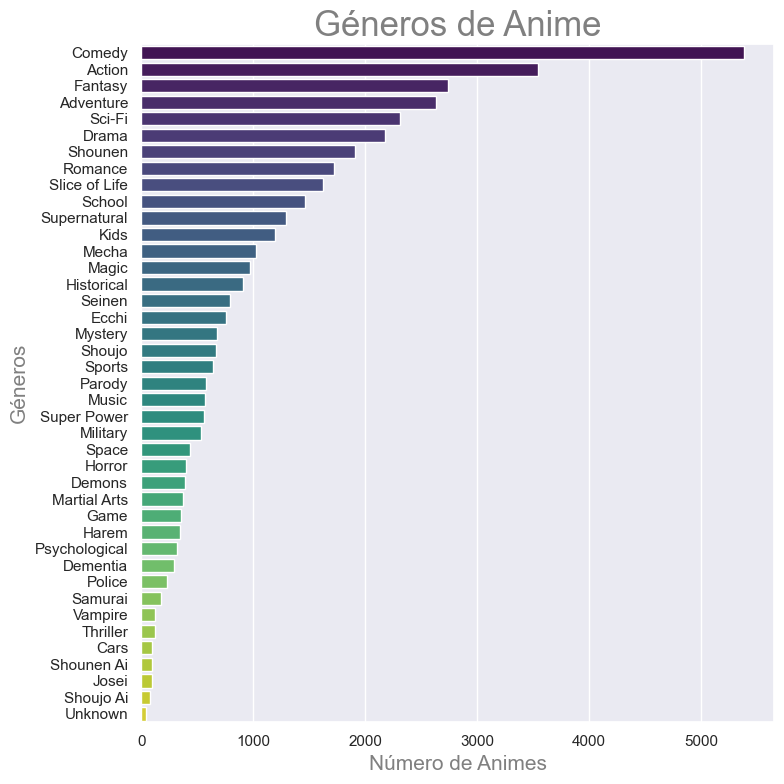

In [670]:
grafico_gen = generos.sum().sort_values(ascending= False)

plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x=grafico_gen.values, y=grafico_gen.index, hue=grafico_gen.index, palette="viridis", dodge=False)
plt.title("Géneros de Anime", color = "Grey", fontsize = 25)
plt.xlabel("Número de Animes", color = "Grey", fontsize = 15)
plt.ylabel("Géneros", color = "Grey", fontsize = 15)

plt.tight_layout()
plt.show()

    Podemos ver que los generos mas comunes son comedia, accion, aventura, fantasia, ciencia ficcion y drama

##### Que estacion del año es la mas comun

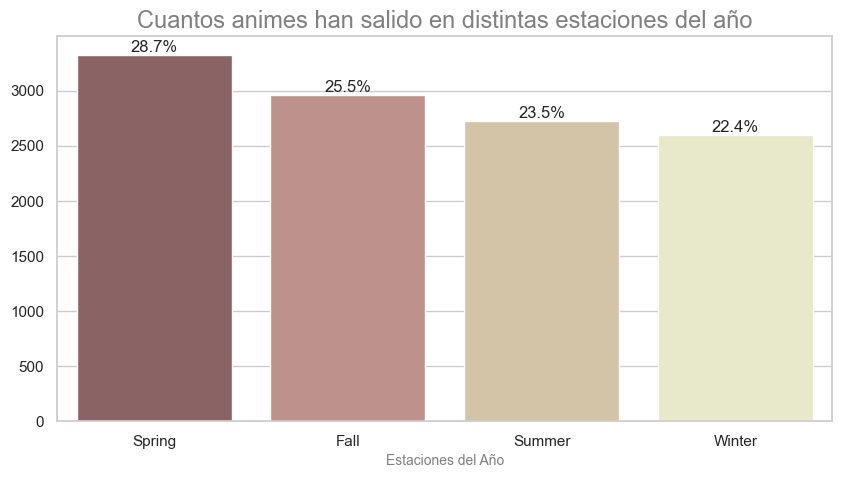

In [737]:
anime_copia = anime_copia[anime_copia["Premiered"] != "Unknown"]

season = anime_copia["Premiered"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=season.index, y=season.values, hue=season.index, palette="pink")

plt.title("Cuantos animes han salido en distintas estaciones del año", color = "Grey", fontsize = 17)
plt.xlabel("Estaciones del Año", color = "Grey", fontsize = 10)

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(season.values):
    porcentaje = (value / season.sum()) * 100
    plt.text(i, value + 0.1, f"{porcentaje:.1f}%", ha="center", va="bottom")

plt.show()

     En esta columna podemos ver que en primavera y otoño suelen salir mas animes pero no hay mucha diferencia del resto. igualmente luego se vera si esta relacionado la estacion del año con la popularidad del anime

##### Para que publico suele ir dirigido el anime

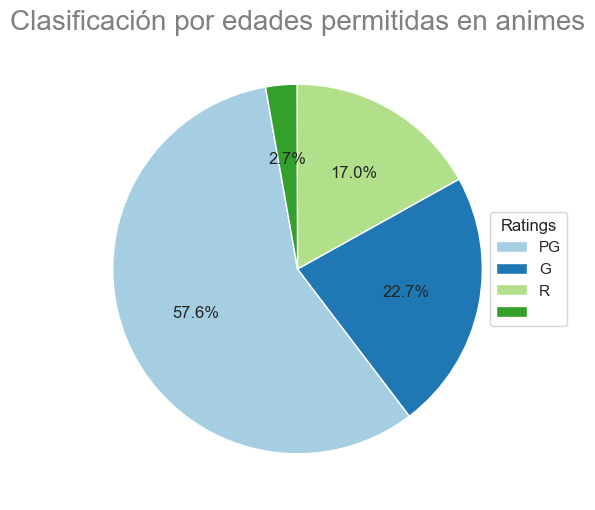

In [746]:
anime_copia = anime_copia[anime_copia['Rating'] != "Unknown"]

edades = anime_copia["Rating"].value_counts()

plt.figure(figsize=(6, 6), facecolor= "None")
plt.pie(edades, startangle=100, colors=sns.color_palette("Paired"), autopct="%1.1f%%")
plt.title("Clasificación por edades permitidas en animes", color="Grey", fontsize=20)
plt.legend(labels=edades.index, title="Ratings",bbox_to_anchor=(1, 0.5), loc="center" )

plt.show()

     Aqui podemos ver que el rating de edad del 57% de los animes esta dirigido para niños.

     PG- PARA NIÑOS
     R- RESTRIGIDO A MENORES DE 17 AÑOS
     G - TODOS LOS PUBLICOS

##### En que mes es mas comun que salga un anime

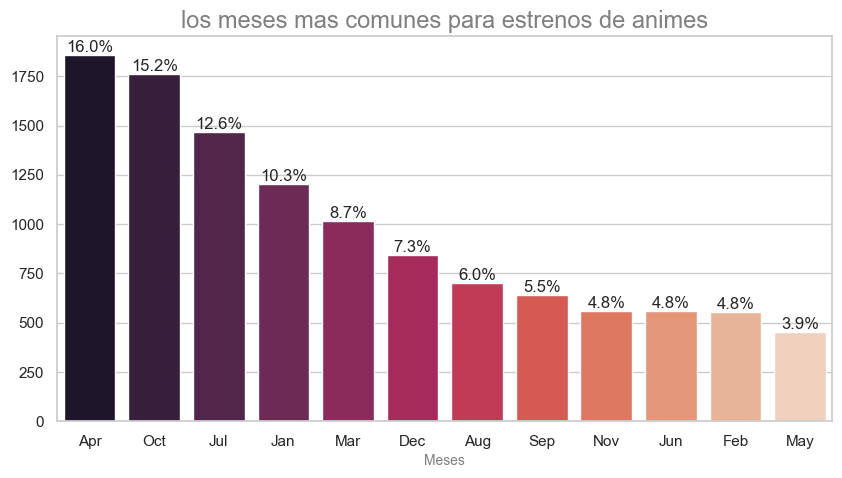

In [760]:
anime_copia = anime_copia[anime_copia["Month Aired"] != "Unknown"]

meses = anime_copia["Month Aired"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=meses.index, y=meses.values, hue=meses.index, palette="rocket")

plt.title("los meses mas comunes para estrenos de animes", color = "Grey", fontsize = 17)
plt.xlabel("Meses", color = "Grey", fontsize = 10)

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(meses.values):
    porcentaje = (value / meses.sum()) * 100
    plt.text(i, value + 0.1, f"{porcentaje:.1f}%", ha="center", va="bottom")

plt.show()

##### Que tipo de anime es mas comun

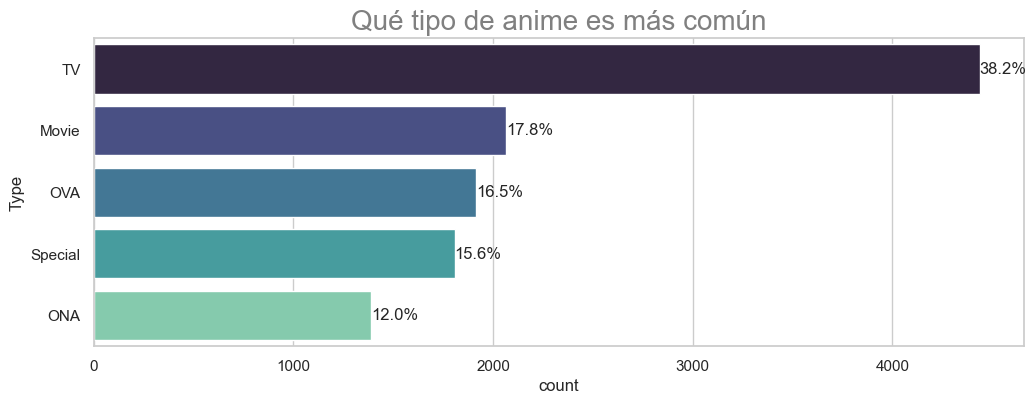

In [764]:
tipo = anime_copia["Type"]

plt.figure(figsize=(12, 4))
sns.countplot(y=tipo, order=tipo.value_counts().index, palette="mako", hue= tipo)
plt.title("Qué tipo de anime es más común", color="Grey", fontsize=20)

# Calcular porcentajes correctamente
total_animes = len(tipo)
for i, value in enumerate(tipo.value_counts().values):
    porcentaje = (value / total_animes) * 100
    plt.text(value + 0.1, i, f"{porcentaje:.1f}%", ha="left", va="center")

plt.show()

##### Cual ha sido la productora que mas animes ha hecho

In [813]:
anime_copia = anime_copia[anime_copia["Producers"] != "Unknown"]

productora = anime_copia["Producers"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=productora.index, y=productora.values, hue=productora.index, palette="pink")

plt.title("Cuantos animes han salido en distintas estaciones del año", color = "Grey", fontsize = 17)
plt.xlabel("Estaciones del Año", color = "Grey", fontsize = 10)

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(productora.values):
    porcentaje = (value / productora.sum()) * 100
    plt.text(i, value + 0.1, f"{porcentaje:.1f}%", ha="center", va="bottom")

plt.show()

KeyboardInterrupt: 

#### <span style="color:#3498DB  "> Analisis bivariante: </span> 

Hacer una correlacion para ver si hay una relacion significativa entre la puntiacion y la popularidad:

In [594]:
#RELACION ENTRE LA PUNTUACION MEDIA Y LA POPULARIDAD
correlacion= anime_copia["Score"].corr(anime_copia["Popularity"])
correlacion

-0.5444101019845234

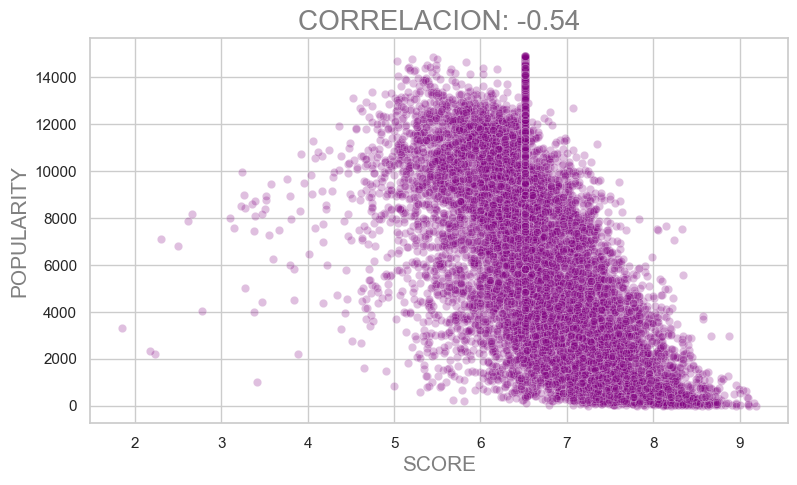

In [595]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x="Score", y="Popularity", data=anime_copia, alpha=0.25, color = "purple")
plt.title(f"CORRELACION: {correlacion:.2f}", color= "Grey", fontsize = 20)
plt.xlabel("SCORE",color = "Grey", fontsize =15)
plt.ylabel("POPULARITY", color = "Grey",fontsize = 15)


plt.show()

    Correlacion negativa. esto quiere decir que la poularidad tiende a disminuir mientras que el score aumenta. En este caso creo que la preferencia del publico no esta relacionada con la puntuacion media.

#### <span style="color:#3498DB  "> Analisis multivariante: </span> 

## <span style="color:#85929E"> CONCLUSIONES Y REFLEXIONES </span> 